In [39]:
import numpy as np 
r = np.load(r"C:/Users/Administrator/Desktop/mode/data_end.npy",allow_pickle=True).item()
s1 = "ew_err_2803"
s2 = "ew_err_2796"
s3 = "z_err"
print(r[s3])

[-1.1394544322751443e-05, 3.3795833587646484e-05, -7.749625633657331e-06, -5.4836273193359375e-06, -1.9727252165147036e-07, -6.735324859619141e-06, -8.577377687224441e-06, -3.3974647521972656e-06, -6.549542091116578e-06, 3.510713577270508e-05, 7.992079315677358e-06, 3.927946090698242e-05, 4.899158052129593e-06, -4.708766937255859e-06, -1.2041682673213927e-05, -1.2099742889404297e-05, 9.74843102330425e-06, -6.139278411865234e-06, -9.387946041439221e-06, 6.514787673950195e-05, -5.199561818880483e-07, -1.6510486602783203e-05, 5.139813264998239e-06, -1.0728836059570312e-05, 1.0491951941471456e-05, 1.0967254638671875e-05, -1.2262317697908642e-05, -3.415346145629883e-05, 1.5254792353758262e-06, 2.205371856689453e-06, 1.6225806700909118e-05, 3.11732292175293e-05, 3.2387210175954806e-06, -6.735324859619141e-06, 7.79968439545975e-06, 5.9604644775390625e-06, -4.451582153564004e-06, 8.761882781982422e-06, 1.6347023006346717e-06, -4.118680953979492e-05, -4.512914364074305e-05, 4.5299530029296875e-

In [44]:
rz = np.array(r[s3])
print("z,meam:",np.mean(rz))
print("z,std:",np.std(rz))

r2796 = np.array(r[s2])
print("ew_2796,meam:",np.mean(r2796))
print("ew_2796,std:",np.std(r2796))

r2803 = np.array(r[s1])
print("ew_2803,meam:",np.mean(r2803))
print("ew_2803,std:",np.std(r2803))


z,meam: -0.008109028004920518
z,std: 0.22525017998174865
ew_2796,meam: 0.057124881595317936
ew_2796,std: 0.45528017997612796
ew_2803,meam: 0.060798346222103485
ew_2803,std: 0.48800611478774164


[1085, 209, 243, 284, 6588, 5178, 336, 298, 225, 1113]


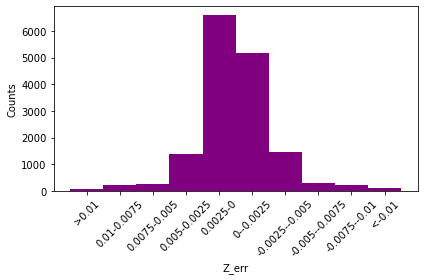

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 data 是你的 numpy 数组，例如：
data = rr

# 定义要统计数量的区间
intervals = [
    (0.1, np.inf),       # 大于0.01
    (0.075, 0.1),       # 0.01-0.0075
    (0.05, 0.075),      # 0.0075-0.005
    (0.025, 0.05),      # 0.005-0.0025
    (0, 0.025),          # 0.0025-0
    (-0.025, 0),         # 0--0.0025
    (-0.05, -0.025),    # -0.0025--0.005
    (-0.075, -0.05),    # -0.005--0.0075
    (-0.1, -0.075),     # -0.0075--0.01
    (-np.inf, -0.1)      # 小于-0.01
]

# 统计各区间内的数量
counts = []
for lower, upper in intervals:
    if np.isinf(lower) and lower < 0:
        counts.append((data <= upper).sum())
    elif np.isinf(upper) and upper > 0:
        counts.append((data > lower).sum())
    else:
        counts.append(((data > lower) & (data <= upper)).sum())
print(counts)

# 进行柱状图的绘制
plt.figure(figsize=(6, 4))  # 可以调整图表大小来更好地展示数据
plt.bar(range(len(counts)), counts, color='purple',width=1.0)

# 设置X轴条目标签
labels = [
    '>0.01', '0.01-0.0075', '0.0075-0.005', '0.005-0.0025',
    '0.0025-0', '0--0.0025', '-0.0025--0.005', '-0.005--0.0075',
    '-0.0075--0.01', '<-0.01'
]
plt.xticks(range(len(counts)), labels, rotation=45)  # 标签旋转便于阅读

# 添加标题和轴标签
# plt.title('Counts by Value Interval')
plt.xlabel('Z_err')
plt.ylabel('Counts')

# 确保图表布局紧密，无遮挡
plt.tight_layout()

# 显示图表
plt.show()